In [17]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae, r2_score, mean_squared_error as mse
from tqdm.auto import tqdm


In [18]:
data = pd.read_csv('data/Final_Dev_Outliers_In.csv')
data.describe()

,Unnamed: 0,YEAR,GP,MPG,FG.,FT.,PTS,RPG,APG,STPG,...,POS.2_PG,POS.2_SF,POS.2_SG,POS.2_C.1,POS.2_F.1,POS.2_G.1,POS.2_PF.1,POS.2_PG.1,POS.2_SF.1,POS.2_SG.1
count,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,...,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,1131.434328,2017.159701,58.042289,23.292687,0.465908,0.741714,10.363930,4.247463,2.305323,0.755731,...,0.070647,0.063682,0.067662,0.089552,0.000995,0.000995,0.093035,0.088557,0.076119,0.105473
std,657.150979,1.940085,20.470443,8.352726,0.081596,0.137470,6.198722,2.496651,1.955561,0.432086,...,0.256298,0.244246,0.251227,0.285610,0.031536,0.031536,0.290554,0.284174,0.265255,0.307238
min,2.000000,2014.000000,1.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,553.250000,2016.000000,46.000000,16.700000,0.419000,0.685000,5.700000,2.400000,0.900000,0.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1140.500000,2017.000000,64.000000,23.900000,0.455500,0.769000,9.000000,3.700000,1.700000,0.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1701.750000,2019.000000,74.000000,30.500000,0.507000,0.828000,14.000000,5.500000,3.100000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2258.000000,2020.000000,83.000000,38.700000,1.000000,1.000000,34.300000,16.000000,11.700000,2.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:

T = np.random.rand(len(data)) < 0.7
V = np.random.rand(len(T)) < 0.2

samp = data.drop(['Unnamed: 0', 'YEAR', 'SALARY.y', 'SALARY.x', 'PLAYER', 'team', 'CAP', 'player_id'], axis=1)

train = samp[T]
test = samp[~T & ~V]
val = samp[V]

x_train = train.drop(['TARGET'], axis=1)
x_val = val.drop(['TARGET'], axis=1)
x_test = test.drop(['TARGET'], axis=1)

y_train = train.TARGET
y_val = val.TARGET
y_test = test.TARGET

In [20]:
len(x_train), len(x_test), len(x_val)

(1400, 483, 443)

[0]	validation-mae:6101305.48787
[1]	validation-mae:5224778.42015
[2]	validation-mae:4585733.04910
[3]	validation-mae:4088301.06941
[4]	validation-mae:3727035.13995
[5]	validation-mae:3467824.57619
[6]	validation-mae:3286087.82393
[7]	validation-mae:3154689.51354
[8]	validation-mae:3058432.41535
[9]	validation-mae:2979973.49407
[10]	validation-mae:2909968.33606
[11]	validation-mae:2844291.88149
[12]	validation-mae:2794188.34565
[13]	validation-mae:2754822.30530
[14]	validation-mae:2735941.00169
[15]	validation-mae:2713436.75339
[16]	validation-mae:2696107.65181
[17]	validation-mae:2677920.21727
[18]	validation-mae:2655782.08606
[19]	validation-mae:2625126.63798
[20]	validation-mae:2607579.68228
[21]	validation-mae:2583111.66874
[22]	validation-mae:2567432.50762
[23]	validation-mae:2553900.60130
[24]	validation-mae:2534019.80813
[25]	validation-mae:2519508.39560
[26]	validation-mae:2498590.54120
[27]	validation-mae:2488680.79458
[28]	validation-mae:2472364.38093
[29]	validation-mae:2438

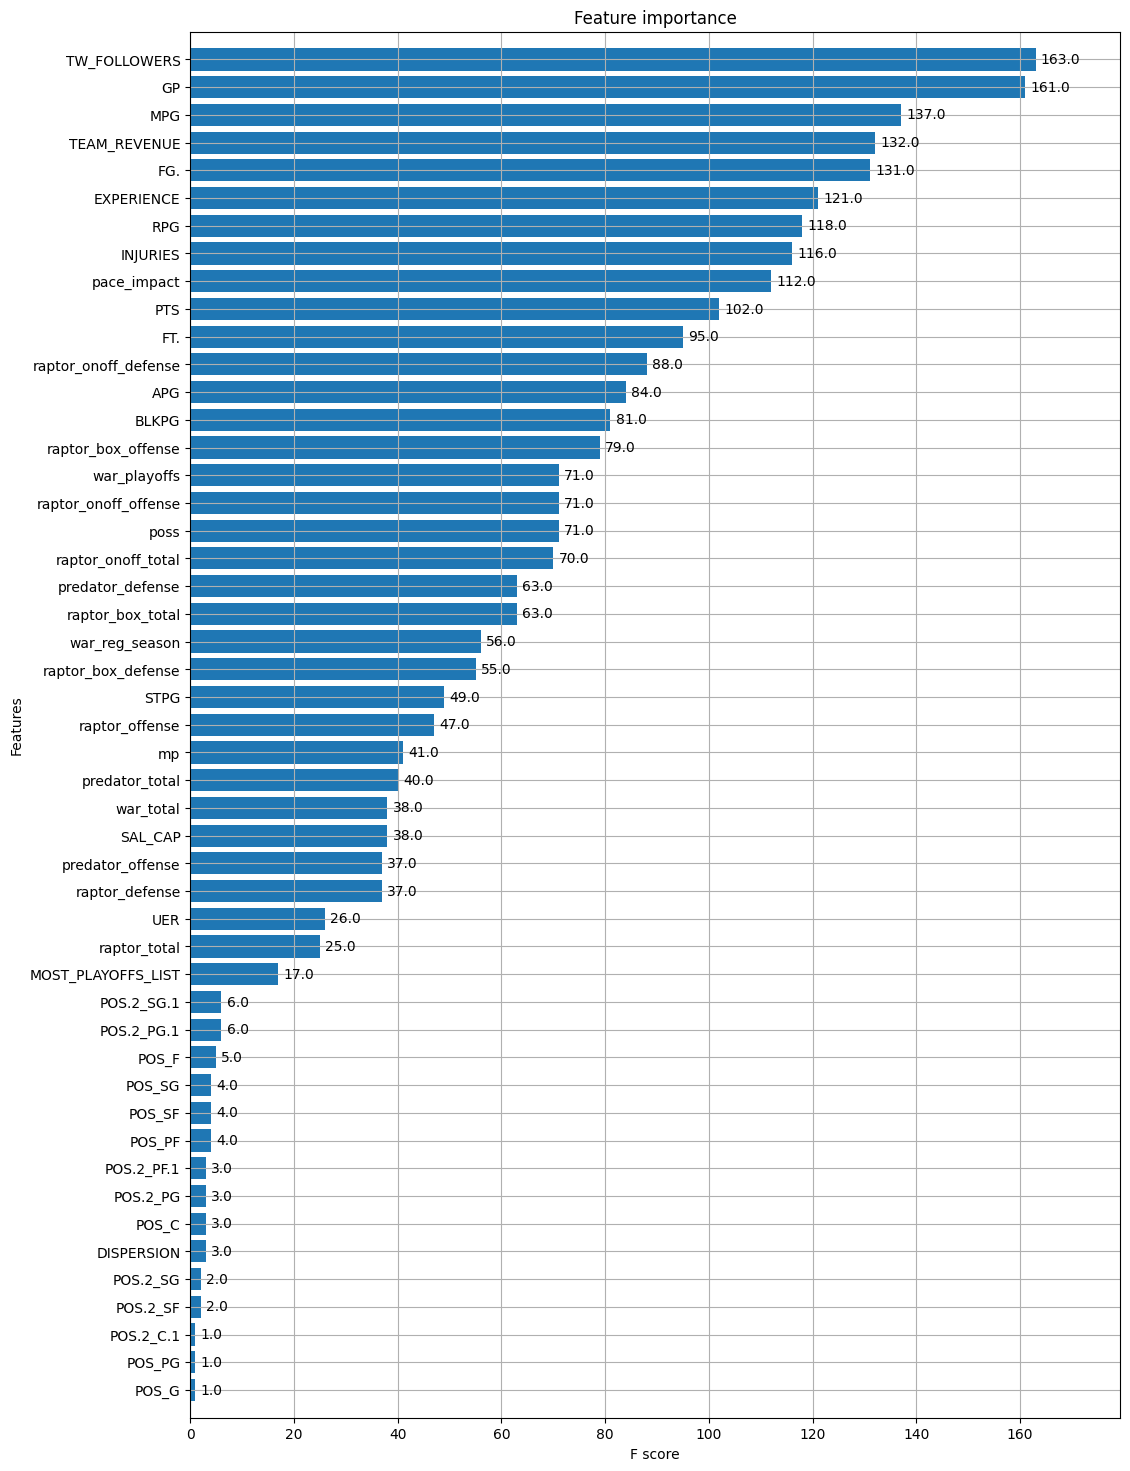

In [21]:
params = {
    'booster' :"gbtree", 
    'objective' :"reg:squarederror", 
    'eta':0.15, 
    'gamma':0, 
    'max_depth':4, 
    'min_child_weight':1, 
    'subsample':1, 
    'colsample_bytree':1,
    'tree_method':'exact',
    'eval_metric': 'mae',
    # 'early_stopping_rounds': 20
}

xgb_train = xgb.DMatrix(x_train, y_train)
xgb_test = xgb.DMatrix(x_test, y_test)
xgb_val = xgb.DMatrix(x_val, y_val)

model = xgb.train(
    params,
    xgb_train,
    evals=[(xgb_val, "validation")],
    num_boost_round=200,
    verbose_eval=True,
    early_stopping_rounds=20
)

y_pred = model.predict(xgb_test)
_mae = mae(y_test, y_pred)
_rmse = mse(y_test, y_pred, squared=False)
print('Test MAE', _mae)

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [22]:
cols = [x.get_text() for x in xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax).get_yticklabels()][::-1][:11]
cols

['TW_FOLLOWERS',
 'GP',
 'MPG',
 'TEAM_REVENUE',
 'FG.',
 'EXPERIENCE',
 'RPG',
 'INJURIES',
 'pace_impact',
 'PTS',
 'FT.']

In [48]:
xgb_x_train = x_train.to_numpy()
xgb_x_test = x_test.to_numpy()
xgb_y_train = y_train.to_numpy()
xgb_y_test = y_test.to_numpy()

model = xgb.XGBRegressor(**params)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
rmse = mse(y_test, y_pred, squared=False)
print("RMSE:", rmse)

_mae = mae(y_test, y_pred)
print("MAE:", _mae)

import numpy as np
thresh = np.sort(model.feature_importances_)

res = []
for t in tqdm(thresh):
    select = SelectFromModel(model, threshold=t, prefit=True)
    select_xtrain = select.transform(xgb_x_train)

    select_model = xgb.XGBRegressor(**params)
    select_model.fit(select_xtrain, xgb_y_train)

    select_xtest = select.transform(xgb_x_test)
    y_pred_new = select_model.predict(select_xtest)
    
    # rmse = mse(xgb_y_test, y_pred_new, squared=False)
    _mae = mae(xgb_y_test, y_pred_new)
    
    r2 = r2_score(xgb_y_test, y_pred_new)
    
    res.append((select_model, _mae, r2))

    print(t, select_xtest.shape[1], _mae, r2)


RMSE: 4555274.393972385
MAE: 3043316.314149845


  0%|          | 0/58 [00:00<?, ?it/s]

0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0 58 3043316.314149845 0.6293805061166551
0.0036127085 46 3043316.314149845 0.6293805061166551
0.0045617106 45 3044373.1951669254 0.6292130484112648
0.0053234347 44 3065547.289402174 0.6290369240584088
0.005618329 43 3065547.289402174 0.6290369240584088
0.006152034 42 3032318.8472437887 0.6272850422276224
0.0063970964 41 3013965.3754852484 0.6310306849084004
0.0071100583 40 2983951.577898551 0.6422603471035739
0.00715824 39 3035819.3018245343 0.6311702671311276
0.007175406 38 2956246.399424172 0.6487615926344

In [51]:
model, err, r2 = sorted(res, key=lambda x: x[1])[0]

In [52]:
err, r2

(2881356.5788043477, 0.6454982671024316)

In [53]:
best = sorted(res, key=lambda x: x[1], reverse=False)[0]
best

(XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.15,
              eval_metric='mae', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.150000006, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...),
 2881356.5788043477,
 0.6454982671024316)

In [54]:
model.feature_importances_.argsort()[::1]

array([2, 3, 6, 0, 5, 1, 4], dtype=int64)

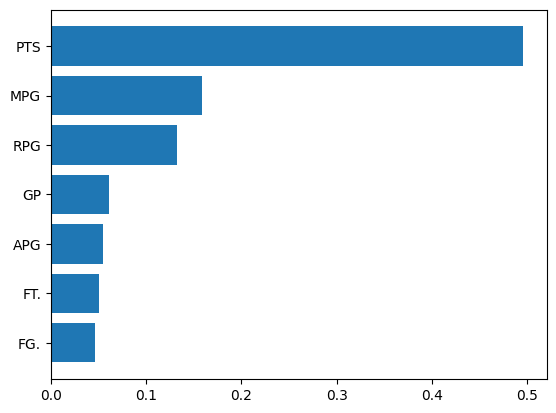

In [55]:
def plot_importance(model):
    sorted_idx = model.feature_importances_.argsort()[::1]
    from matplotlib import pyplot as plt
    n_top_features = 20
    sorted_idx = model.feature_importances_.argsort()[::1]
    plt.barh(x_test.columns[sorted_idx][:n_top_features ], model.feature_importances_[sorted_idx][:n_top_features ])
    plt.show()
    
    return x_test.columns[sorted_idx][:n_top_features ]
    
res = plot_importance(best[0])

In [56]:
cols = [x for x in res]

In [57]:
py = pd.DataFrame([err, r2, *cols])
py.to_csv('data/xgb_rfe_py.csv')
py

,0
0,2881356.578804
1,0.645498
2,FG.
3,FT.
4,APG
5,GP
6,RPG
7,MPG
8,PTS
